In [1]:
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
from openpyxl.drawing.image import Image

wb = openpyxl.load_workbook("data/Bias_correction_ucl.xlsx")

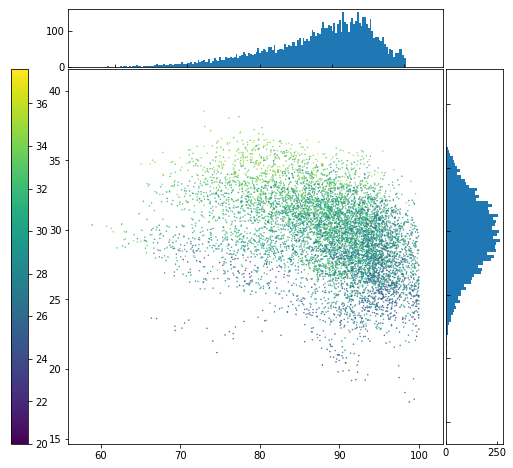

In [18]:
sheet = wb["Sheet1"]
last_row = len(sheet["A"])

Fvalues = [float(sheet["F{}".format(i)].value) for i in range(2, last_row+1)]
Gvalues = [float(sheet["G{}".format(i)].value) for i in range(2, last_row+1)]
Cvalues = [float(sheet["C{}".format(i)].value) for i in range(2, last_row+1)]

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.1]
rect_histy = [left + width + spacing, bottom, 0.1, height]

fig = plt.figure(figsize=(8, 8))
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params()
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

scat = ax_scatter.scatter(Fvalues, Gvalues, s=0.2, c=Cvalues)
cbaxes = fig.add_axes([0., 0.1, 0.03, 0.65])
plt.colorbar(scat, cax = cbaxes)

binwidth = 0.25
max_lim_F = max(Fvalues) + 3
min_lim_F = min(Fvalues) - 3
max_lim_G = max(Gvalues) + 3
min_lim_G = min(Gvalues) - 3
ax_scatter.set_xlim((min_lim_F, max_lim_F))
ax_scatter.set_ylim((min_lim_G, max_lim_G))

bins_F = np.arange(min_lim_F, max_lim_F, binwidth)
bins_G = np.arange(min_lim_G, max_lim_G, binwidth)
ax_histx.hist(Fvalues, bins=bins_F)
ax_histy.hist(Gvalues, bins=bins_G, orientation='horizontal')
#ax_histx.set_xlim((min_lim_F, max_lim_F))
#ax_histy.set_ylim((min_lim_G, max_lim_G))

plt.savefig("scatterchart.jpg")

In [3]:
img = Image("scatterchart.jpg")
sheet.add_image(img, "I2")
wb.save("pyplot_chart_data_hist.xlsx")

C:\Users\User\Anaconda3\lib\site-packages\openpyxl\worksheet\worksheet.py:695: DeprecationWarning: Call to deprecated function anchor (Anchors can be passed in when an image is added to a worksheet).
  img.anchor(cell, anchortype="oneCell")
